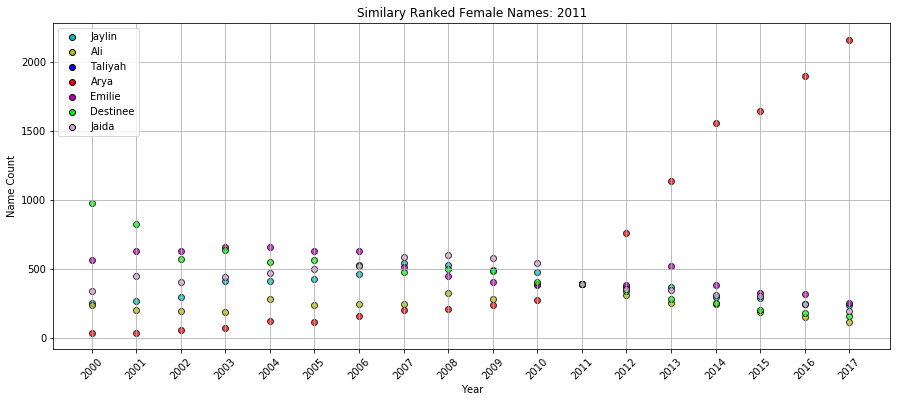

In [1]:
%matplotlib inline

import pandas as pd
import os
from matplotlib import pyplot as plt
import requests
import json

# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Jaylin","F","c"),
             ("Ali","F","y"),
             ("Taliyah","M","b"),
             ("Arya","F","r"),
             ("Emilie","F","m"),
             ("Destinee","F","lime"),
             ("Jaida","F","plum")
            ]
plt.figure(figsize=(15,6))
def scatterList(namesList):
    """namesDict = A dictionary. Dictionary should be in the format namesList = [(name,gender,color),
                                                                                 (name,gender,color)]
        A scatter plot from year 2000 onward will be produced"""
    # go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
    for filename in os.listdir("Resources/names"):
        if 'yob20' in filename:
            name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
            name_df = pd.DataFrame(name_file)
            name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
    # add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
            name_df["Year"] = os.path.splitext(filename)[0][-4:]
    # find the name in the current file and plot the point
            for name in namesList:
                year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
                count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
                if count != 0:
                    plt.scatter(year,count,c=f"{name[2]}",edgecolor=(0,0,0),alpha=0.75)

handles = [plt.scatter([],
                     [],
                     marker="o",
                     color=name[2],
                     label=name[0],
                     edgecolor=(0,0,0)) for name in got_names]
plt.legend(handles=handles,
           markerscale=1)
scatterList(got_names)
# rotate years, add title and x/y labels    
plt.xticks(rotation=45)
plt.title("Similary Ranked Female Names: 2011")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.grid()
plt.savefig("Graph_Images/GoT/arya_vs_similarly_ranked.png")
plt.show()

In [44]:
alidf['Color'][0]

'r'

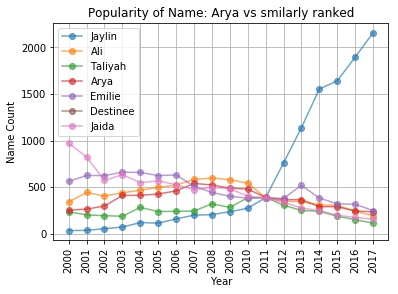

In [53]:
# a list to hold all instances where Arya is Female in .txt files. Loop through this list to create scatter plot
# add (name, gender, color) to got_names list to add to scatter plot
got_names = [("Jaylin","F","c"),
             ("Ali","F","y"),
             ("Taliyah","M","b"),
             ("Arya","F","r"),
             ("Emilie","F","m"),
             ("Destinee","F","lime"),
             ("Jaida","F","plum")
            ]
jaylin = []
ali = []
taliya = []
arya = []
emilie = []
destinee = []
jaida = []
total_counts = []
averages = []
# go through each file in 'names' folder, if 'yob20' is in the filename, put the file in a DF called name_df
for filename in os.listdir("Resources/names"):
    if 'yob20' in filename:
        name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
        name_df = pd.DataFrame(name_file)
        name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for 2005.txt)
        name_df["Year"] = os.path.splitext(filename)[0][-4:]
        total_counts.append(name_df[name_df["Year"]==f'{name_df["Year"][0]}']["Birth Count"].sum())
        averages.append([os.path.splitext(filename)[0][-4:],name_df["Birth Count"].mean()])
# find the name in the current file and plot the point
        for name in got_names:
            character = name[0]
            year = str(name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Year"] != "0") & (name_df["Gender"] == f"{name[1]}")]['Year'].sum())
            birth_count = name_df[(name_df["Name"]==f"{name[0]}") & (name_df["Gender"] == f"{name[1]}")]["Birth Count"].sum()
            if year != '0':
                if character == "Arya":
                    arya.append([year,birth_count,'b'])
                elif character == "Jaylin":
                    jaylin.append([year,birth_count,'y'])
                elif character == "Ali":
                    ali.append([year,birth_count,'r'])
                elif character == "Taliya":
                    taliya.append([year,birth_count,'c'])
                elif character == "Emilie":
                    emilie.append([year,birth_count,'lime'])
                elif character == "Destinee":
                    destinee.append([year,birth_count,'k'])
                elif character == "Jaida":
                    jaida.append([year,birth_count,'plum'])
                                    
                        
aryadf = pd.DataFrame(arya, columns=["Year","Birth Count","Color"])
jaidadf = pd.DataFrame(jaida, columns=["Year","Birth Count","Color"])
alidf = pd.DataFrame(ali, columns=["Year","Birth Count","Color"])
jaylindf = pd.DataFrame(jaylin, columns=["Year","Birth Count","Color"])
emiliedf = pd.DataFrame(emilie, columns=["Year","Birth Count","Color"])
taliyadf = pd.DataFrame(taliya, columns=["Year","Birth Count","Color"])
destineedf = pd.DataFrame(destinee, columns=["Year","Birth Count","Color"])

dflist = [aryadf,jaidadf, alidf, jaylindf, emiliedf, taliyadf, destineedf]
for df, name in zip(dflist, got_names):
    plt.plot(df["Year"],df["Birth Count"], marker='o', label=name[0], alpha=.65)
plt.legend()
# rotate years, add title and x/y labels    
plt.xticks(rotation=90)
plt.title("Popularity of Name: Arya vs smilarly ranked")
plt.xlabel("Year")
plt.ylabel("Name Count")
plt.grid()
plt.savefig("Graph_Images/GoT/mixed_GOT_names.png")
plt.show()

In [3]:
averagedf = pd.DataFrame(averages)
averagedf = averagedf.rename(columns={0:"Year",1:"name(average)"})

In [4]:
averagedf

,Year,name(average)
0,2000,126.913198
1,2001,123.606693
2,2002,122.240683
3,2003,121.860341
4,2004,119.152500
5,2005,118.048424
6,2006,115.982982
7,2007,114.277740
8,2008,111.957742
9,2009,109.954412


In [5]:
# the above is the average number of babies born with the same name in given year.
# (ex. Each name, on average, had 110 people born with it in 2016)
# this can be used to compare the amount of people with an average to our GOT names.


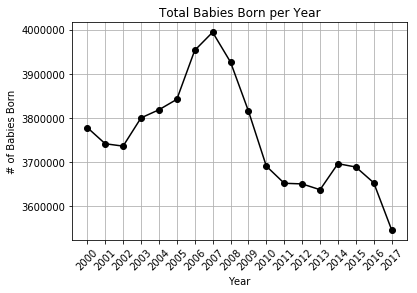

In [6]:
plt.plot(averagedf["Year"],total_counts, marker='o', c="k")
plt.xticks(rotation=45)
plt.title("Total Babies Born per Year")
plt.xlabel("Year")
plt.ylabel("# of Babies Born")
plt.grid()
plt.savefig("Graph_Images/GoT/babies_born_per_year.png")
plt.show()
# interesting note: Sharp change in babies born per year around '07. Possibly due to finacial crisis?

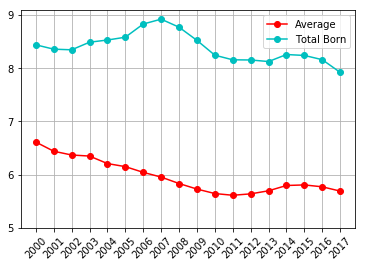

In [7]:
def norm(data):
    return (data)/(max(data)-min(data))
plt.plot(aryadf["Year"],norm(averagedf["name(average)"]), marker='o', c="r",label='Average')
plt.plot(averagedf["Year"],norm(total_counts), marker='o', c="c",label='Total Born')
plt.xticks(rotation=45)
plt.grid()
plt.yticks(range(5,10))
plt.legend()

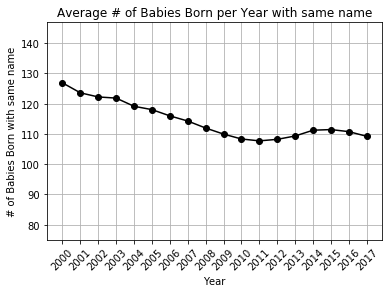

In [8]:
plt.plot(aryadf["Year"],averagedf["name(average)"], marker='o', c="k")
plt.xticks(rotation=45)
plt.ylim(75,averagedf["name(average)"].max()+20)
plt.title("Average # of Babies Born per Year with same name")
plt.xlabel("Year")
plt.ylabel("# of Babies Born with same name")
plt.grid()
plt.savefig("Graph_Images/GoT/average_name_use.png")
plt.show()

In [9]:
aryadf = aryadf.drop('Color',axis=1)
jondf = jondf.drop('Color',axis=1)
sansadf = sansadf.drop('Color',axis=1)
daenerysdf = daenerysdf.drop('Color',axis=1)
khaleesidf = khaleesidf.drop('Color',axis=1)

In [10]:
aryadf

,Year,Birth Count
0,2000,34
1,2001,36
2,2002,54
3,2003,71
4,2004,120
5,2005,113
6,2006,159
7,2007,199
8,2008,205
9,2009,236


In [11]:
jondf

,Year,Birth Count
0,2000,752
1,2001,729
2,2002,723
3,2003,692
4,2004,635
5,2005,618
6,2006,595
7,2007,537
8,2008,511
9,2009,444


In [12]:
sansadf

,Year,Birth Count
0,2013,11
1,2014,12
2,2015,20
3,2016,26
4,2017,20


In [13]:
daenerysdf

,Year,Birth Count
0,2012,21
1,2013,68
2,2014,86
3,2015,82
4,2016,101
5,2017,110


In [14]:
khaleesidf

,Year,Birth Count
0,2011,28
1,2012,146
2,2013,243
3,2014,369
4,2015,341
5,2016,371
6,2017,466


In [15]:
def compareToAverage(namedf, label=None, title=None):
    """namedf = A dataframe with Year and Birth count columns"""
    k = plt.bar(namedf["Year"].astype(int),namedf["Birth Count"],.45,label=label)
    a = plt.bar(namedf["Year"].astype(int)+.45, averagedf['name(average)'][-len(namedf):],.45,label="Average")
    plt.subplot().set_xticks(namedf["Year"].astype(int) + .45 / 2)
    plt.subplot().set_xticklabels(namedf["Year"])
    plt.xticks(rotation=45)
    plt.xlabel("Year")
    plt.ylabel("Name Count")
    plt.title(title)
    plt.legend()

C:\Users\josep\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


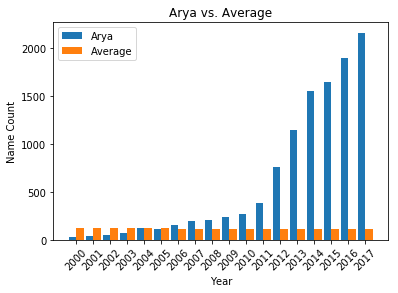

In [16]:
compareToAverage(aryadf, label="Arya",title="Arya vs. Average")
plt.savefig("Graph_Images/GoT/arya_vs_average.png")

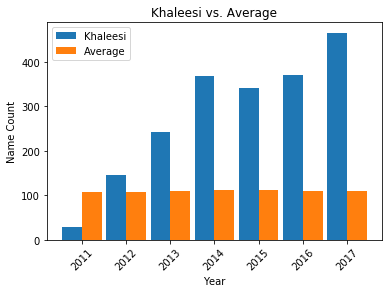

In [17]:
compareToAverage(khaleesidf, label="Khaleesi",title="Khaleesi vs. Average")
plt.savefig("Graph_Images/GoT/khaleesi_vs_average.png")

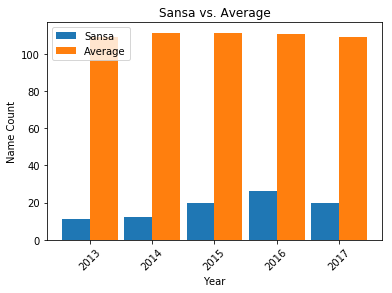

In [18]:
compareToAverage(sansadf, label="Sansa",title="Sansa vs. Average")
plt.savefig("Graph_Images/GoT/sansa_vs_average.png")

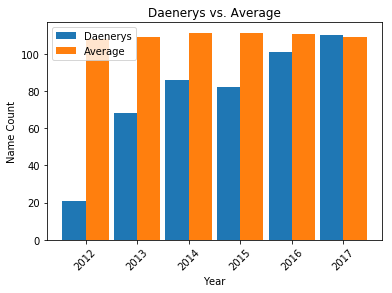

In [19]:
compareToAverage(daenerysdf, label="Daenerys",title="Daenerys vs. Average")
plt.savefig("Graph_Images/GoT/Daenerys_vs_average.png")

In [20]:
url = "https://anapioficeandfire.com/api/"

#Possible url titles:
## - /Books/
## - /Characters/
## - /Houses/
female_names = []
#request Copy/paste 2 lines into new blocks
females = {"Arya": 148,
           "Arienne": 130,
           "Asha":150,
           "Brienne":216,
           "Cersei": 238}
colors = ['b','r','y','c','m']
for female,color in zip(females.values(),colors):
    response = requests.get(f"{url}Characters/{female}").json()['name'].split()[0]

    female_names.append(response)
female_names

['Arya', 'Arianne', 'Asha', 'Brienne', 'Cersei']

In [21]:
def plotList(names, gender, marker='o',alpha=0.65, yob='yob20'):
    """names = a list of names
       gender = a single string character, either 'F', or 'M' to respresent female or male respectively
       """
    df = pd.DataFrame()
    for filename in os.listdir("Resources/names"):
        if yob in filename:
            name_file = pd.read_csv(f"Resources/names/{filename}",header=None)
            name_df = pd.DataFrame(name_file)
            name_df = name_df.rename(columns={0:'Name', 1:'Gender',2:'Birth Count'})
# add a year column to the DF based on the filename(ex. add 2005 to year column for yob2005.txt)
            name_df["Year"] = os.path.splitext(filename)[0][-4:]
# find the name in the current file and plot the point
            name_df = name_df[name_df["Gender"]==gender]
            df = df.append(name_df)


    gotDF = df[df["Name"].isin(names)]
    for name in names:
        plt.plot(sorted(gotDF[gotDF["Name"]==f"{name}"]["Year"]),gotDF[gotDF["Name"]==f"{name}"]["Birth Count"],marker=marker,alpha=alpha)
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(labels=names)

Text(0.5, 0, 'Year')

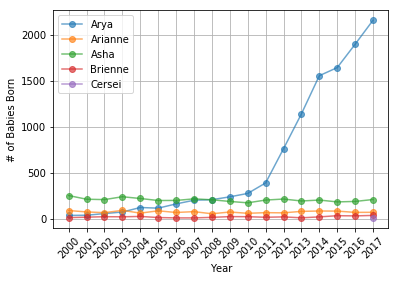

In [22]:
plotList(female_names,"F")
plt.ylabel("# of Babies Born")
plt.xlabel("Year")

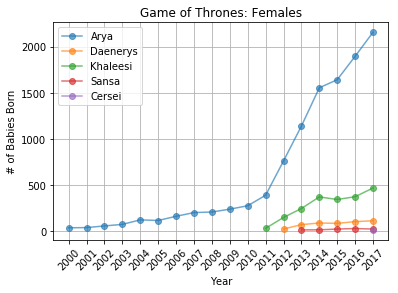

In [23]:
names = ["Arya",
         "Daenerys",
         "Khaleesi",
         "Sansa",
         "Cersei"]
         
plotList(names,"F")
plt.title("Game of Thrones: Females")
plt.ylabel("# of Babies Born")
plt.xlabel("Year")
plt.savefig("Graph_Images/GoT/female_GOT_names.png")
# Arya clearly got a boost from the show star

In [24]:
url = "https://anapioficeandfire.com/api/"

#Possible url titles:
## - /Books/
## - /Characters/
## - /Houses/
male_names = []
#request Copy/paste 2 lines into new blocks
males = {"Brandon":208,
         "Doran":326,
         "Eddard":339,
         "Jon":583,
         "Tyrion":1052,
        }

# make request to Game of Thrones API
for male in males.values():
    response = requests.get(f"{url}Characters/{male}").json()
    name = response['name'].split()[0]
    male_names.append(name)
male_names

['Brandon', 'Doran', 'Eddard', 'Jon', 'Tyrion']

Text(0.5, 0, 'Year')

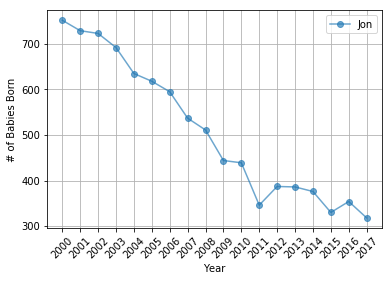

In [25]:
plotList(["Jon"],"M")
plt.ylabel("# of Babies Born")
plt.xlabel("Year")
# something weird going on with 2017 on this one when Benjen is included

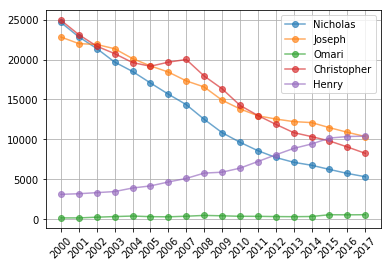

In [26]:
names = ["Nicholas","Joseph","Omari","Christopher","Henry"]
plotList(names,"M")

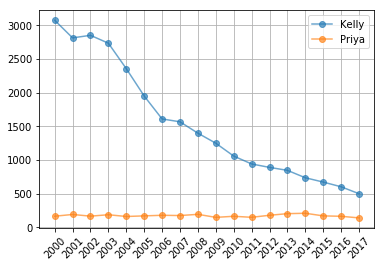

In [27]:
names = ["Kelly","Priya"]
plotList(names,"F")

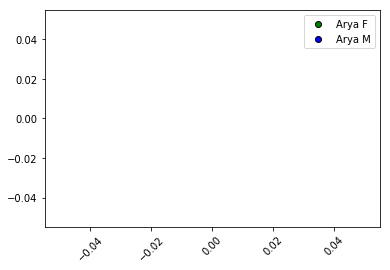

In [29]:
arya = [("Arya","F","g"),
        ("Arya","M","b")]


plt.grid()
plt.xticks(rotation=45)
handles = [plt.scatter([],
                     [],
                     marker="o",
                     color=name[2],
                     label=name[0] + " " + name[1],
                     edgecolor=(0,0,0)) for name in arya]
plt.legend(handles=handles,
           markerscale=1)
plt.savefig("Graph_Images/GoT/arya_male_vs_female.png")